In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime
from citipy import citipy
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

#import api keys
from api_keys import weather_api_key


#file to export weathe data
out_data_file = "output_data/list_cities.csv"

#work with longitude and latitude
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#define variables
lat_lngs = []
cities = []

latitudes = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lonitudes = np.random.uniform(lng_range[0],lng_range[1],size=1500)
lat_lng = zip(latitudes,lonitudes)

for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()

    if city not in cities:
        cities.append(city)


len(cities)

628

In [4]:
print(cities)

['Cape town', 'Port elizabeth', 'Busselton', 'Neryungri', 'Guerrero negro', 'Illoqqortoormiut', 'College', 'Geraldton', 'Avarua', 'Ushuaia', 'Puerto del rosario', 'Butaritari', 'Bredasdorp', 'Labuhan', 'Chimbote', 'Airai', 'Chokurdakh', 'Kalmunai', 'Saint-pierre', 'Lebu', 'Punta arenas', 'Hobart', 'Amahai', 'Atuona', 'Katsuura', 'Lata', 'Yellowknife', 'Marsabit', 'Palora', 'Hermanus', 'Sovetskiy', 'Narsaq', 'Vaini', 'Ulladulla', 'Namatanai', 'Sapa', 'Port alfred', 'Vilyuysk', 'Oranjemund', 'Moussoro', 'Doha', 'Naica', 'Bluff', 'Farafangana', 'Odweyne', 'Banda aceh', 'Albany', 'Soyo', 'Belushya guba', 'Puerto ayora', 'Namtsy', 'Vila velha', 'Buzdyak', 'San quintin', 'Rikitea', 'Victoria', 'Saskylakh', 'San juan', 'Ixtapa', 'Qaanaaq', 'Mataura', 'Bud', 'Tasiilaq', 'Sao filipe', 'Saldanha', 'Umzimvubu', 'Kaura namoda', 'Muros', 'Nago', 'Taolanaro', 'Pisco', 'Aykhal', 'Barrow', 'New norfolk', 'Luderitz', 'Barbar', 'Vila do maio', 'Vicksburg', 'Souillac', 'Ondorhaan', 'Fairbanks', 'Candido 

## API call

In [5]:
#call API
base_url = "http://api.openweathermap.org/data/2.5/weather?"

weather_url = base_url+"appid="+weather_api_key+"&q=Itarema"


In [6]:
#get api information
weather = requests.get(weather_url).json()

In [7]:
pprint(weather)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -2.92, 'lon': -39.92},
 'dt': 1596156759,
 'id': 3393692,
 'main': {'feels_like': 298.26,
          'grnd_level': 1011,
          'humidity': 74,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 298.88,
          'temp_max': 298.88,
          'temp_min': 298.88},
 'name': 'Itarema',
 'sys': {'country': 'BR', 'sunrise': 1596098783, 'sunset': 1596141937},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 94, 'speed': 6.67}}


In [8]:
city = weather['name']
print(city)

Itarema


In [9]:
#Collect API data and make it a Json
city_data = []



print("----------Initiate data collection----------")

for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    weather_url = base_url+"appid="+weather_api_key+"&q="
    weather = requests.get(weather_url + city).json()

    try:
        country = weather['sys']['country']
        lat = weather['coord']['lat']
        lon = weather['coord']['lon']
        max_temp = weather['main']['temp_max']
        humidity = weather['main']['humidity']
        cloud = weather['clouds']['all']
        wind = weather['wind']['speed']
        print(f"Info for {city} in process")
    except KeyError:
        print(f"Data for {city} skiped")
        continue
    city_dict = {
        "city":city,
        "country":country,
        "latitude":lat,
        "longitude":lon,
        "max_temperature":max_temp,
        "humidity":humidity,
        "cloudiness":cloud,
        "wind_speed":wind}
    city_data.append(city_dict)


print("------------ Completed ------------")


----------Initiate data collection----------
Info for Cape town in process
Info for Port elizabeth in process
Info for Busselton in process
Info for Neryungri in process
Info for Guerrero negro in process
Data for Illoqqortoormiut skiped
Info for College in process
Info for Geraldton in process
Info for Avarua in process
Info for Ushuaia in process
Info for Puerto del rosario in process
Info for Butaritari in process
Info for Bredasdorp in process
Info for Labuhan in process
Info for Chimbote in process
Info for Airai in process
Info for Chokurdakh in process
Info for Kalmunai in process
Info for Saint-pierre in process
Info for Lebu in process
Info for Punta arenas in process
Info for Hobart in process
Info for Amahai in process
Info for Atuona in process
Info for Katsuura in process
Info for Lata in process
Info for Yellowknife in process
Info for Marsabit in process
Info for Palora in process
Info for Hermanus in process
Info for Sovetskiy in process
Info for Narsaq in process
Info 

## Visualization

Your first objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude


In [10]:
#Create DataFrame
weather_df = pd.DataFrame(city_data)
weather_df.head(3)

,city,country,latitude,longitude,max_temperature,humidity,cloudiness,wind_speed
0,Cape town,ZA,-33.93,18.42,283.15,100,0,1.0
1,Port elizabeth,ZA,-33.92,25.57,285.15,87,0,2.6
2,Busselton,AU,-33.65,115.33,285.37,90,0,2.3


In [11]:
weather_df['humidity'] = weather_df['humidity'].astype(float)
weather_df['cloudiness'] = weather_df['cloudiness'].astype(float)
weather_df.head(3)

,city,country,latitude,longitude,max_temperature,humidity,cloudiness,wind_speed
0,Cape town,ZA,-33.93,18.42,283.15,100.0,0.0,1.0
1,Port elizabeth,ZA,-33.92,25.57,285.15,87.0,0.0,2.6
2,Busselton,AU,-33.65,115.33,285.37,90.0,0.0,2.3


In [12]:
weather_df.to_csv("weather_data.csv")

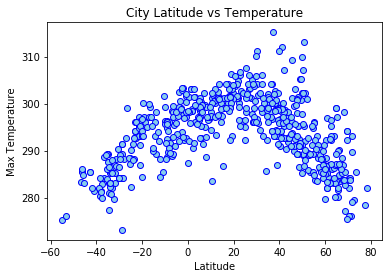

In [13]:
#Latitude vs Temperature
x_value = weather_df['latitude']
y_value = weather_df['max_temperature']
plt.scatter(x_value,y_value,marker="o",color="skyblue", edgecolors="blue")
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.savefig("./images/Lat_Temperature.png")
plt.show()

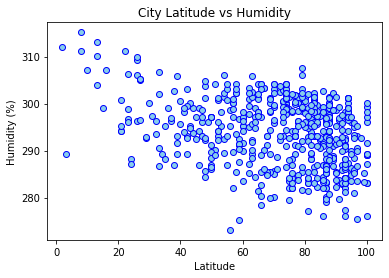

In [14]:
#Latitude vs Humidity
x_value = weather_df['latitude']
x_value = weather_df['humidity']
plt.scatter(x_value,y_value,marker="o",color="skyblue", edgecolors="blue")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("./images/Lat_Humidity.png")
plt.show()

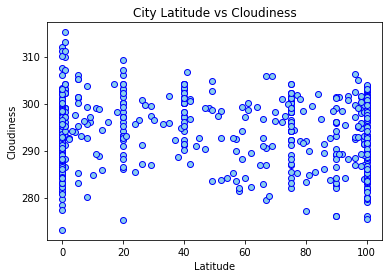

In [15]:
#Latitude vs Cloudiness
x_value = weather_df['latitude']
x_value = weather_df['cloudiness']
plt.scatter(x_value,y_value,marker="o",color="skyblue", edgecolors="blue")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("./images/Lat_Cloudiness.png")
plt.show()

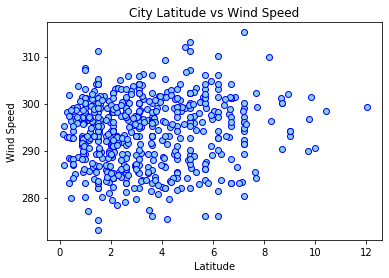

In [16]:
#Latitude vs Wind Speed
x_value = weather_df['latitude']
x_value = weather_df['wind_speed']
plt.scatter(x_value,y_value,marker="o",color="skyblue", edgecolors="blue")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("./images/Lat_Cloudiness.png")
plt.show()


## Linear Regression

In [17]:
north_cities = weather_df.loc[weather_df["latitude"] > 0.01]
south_cities = weather_df.loc[weather_df["latitude"] < -0.01]

The r-squared is: -0.609218945880995


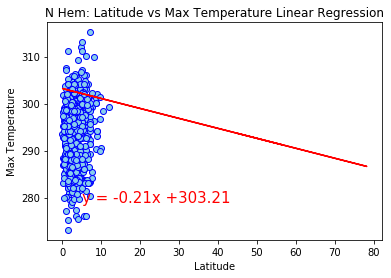

In [18]:
#North Linear Regression Lat vs Temperature
x_values = north_cities['latitude']
y_values = north_cities['max_temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o",color="skyblue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,279),fontsize=15,color="red")
plt.title('N Hem: Latitude vs Max Temperature Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue}")

plt.savefig("./images/NReg_Temperature.png")
plt.show()


The r-squared is: -0.10488576193042272


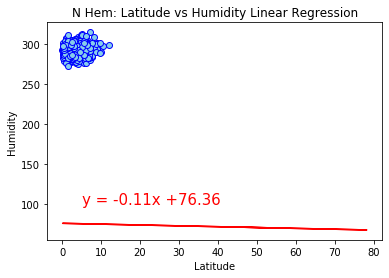

In [19]:
#North Linear Regression Lat vs Humidity
x_values = north_cities['latitude']
y_values = north_cities['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o",color="skyblue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,100),fontsize=15,color="red")
plt.title('N Hem: Latitude vs Humidity Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")

plt.savefig("./images/NReg_Humidity.png")
plt.show()

The r-squared is: -0.08464373221942788


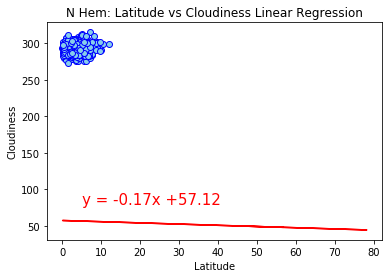

In [20]:
#North Linear Regression Lat vs Cloudiness
x_values = north_cities['latitude']
y_values = north_cities['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o",color="skyblue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,80),fontsize=15,color="red")
plt.title('N Hem: Latitude vs Cloudiness Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")

plt.savefig("./images/NReg_Cloudiness.png")
plt.show()

The r-squared is: 0.0006622001763787191


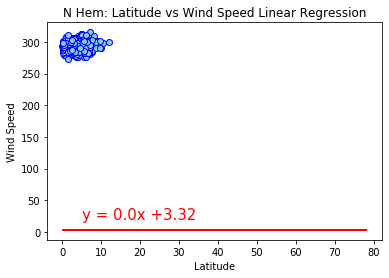

In [21]:
#North Linear Regression Lat vs Wind Speed
x_values = north_cities['latitude']
y_values = north_cities['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o",color="skyblue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")
plt.title('N Hem: Latitude vs Wind Speed Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")

plt.savefig("./images/NReg_wind.png")
plt.show()

The r-squared is: 0.775292015500312


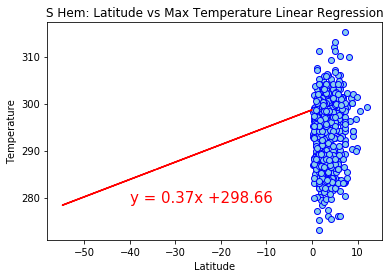

In [27]:
#South Linear Regression Lat vs Temperature
x_values = south_cities['latitude']
y_values = south_cities['max_temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o",color="skyblue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,279),fontsize=15,color="red")
plt.title('S Hem: Latitude vs Max Temperature Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue}")

plt.savefig("./images/SReg_Temperature.png")
plt.show()

The r-squared is: -0.0339762168424912


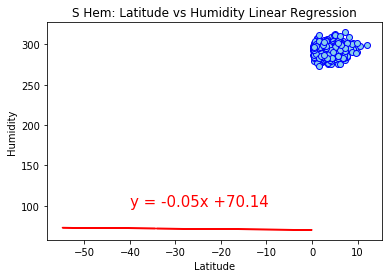

In [28]:
#South Linear Regression Lat vs Humidity
x_values = south_cities['latitude']
y_values = south_cities['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o",color="skyblue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,100),fontsize=15,color="red")
plt.title('S Hem: Latitude vs Humidity Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")

plt.savefig("./images/SReg_Humidity.png")
plt.show()

The r-squared is: -0.021761384634698063


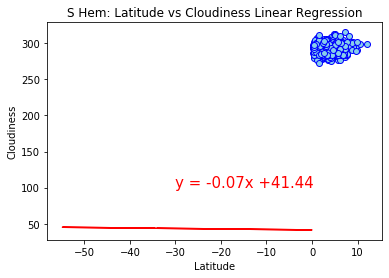

In [29]:
#South Linear Regression Lat vs Cloudiness
x_values = south_cities['latitude']
y_values = south_cities['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o",color="skyblue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,100),fontsize=15,color="red")
plt.title('S Hem: Latitude vs Cloudiness Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")

plt.savefig("./images/SReg_Cloudiness.png")
plt.show()

The r-squared is: -0.10053879853443914


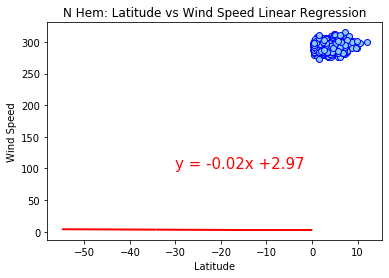

In [30]:
#North Linear Regression Lat vs Wind Speed
x_values = south_cities['latitude']
y_values = south_cities['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_value,y_value,marker="o",color="skyblue", edgecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,100),fontsize=15,color="red")
plt.title('N Hem: Latitude vs Wind Speed Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")

plt.savefig("./images/NReg_wind.png")
plt.show()